![image-alt-text](PoweredByAzure.png)



# Case Study: Phishing Attack -Binary Classification-

    Import libraries

In [1]:
#Data Processing
import pandas as pd
import numpy as np
import seaborn as sns
#ML Algorithms & Metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
#Visualization
import matplotlib
import matplotlib.pyplot as plt
#Preprocessing Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#Deployment
import joblib
import sklearn
from azureml.core import Workspace
from azureml.core import Model
from azureml.core.resource_configuration import ResourceConfiguration
import json
import pickle
import os
import joblib
from azureml.core.model import Model
from inference_schema.schema_decorators import input_schema, output_schema
from inference_schema.parameter_types.numpy_parameter_type import NumpyParameterType
from inference_schema.parameter_types.pandas_parameter_type import PandasParameterType
from datetime import datetime
from azureml.core import Environment
from azureml.core.conda_dependencies import CondaDependencies
from azureml.core.model import Model, InferenceConfig
from azureml.core.webservice import AciWebservice, Webservice
from azureml.core.model import Model

    Defining General Purpose Functions

In [2]:
def percentage(part, whole):
  percentage = 100 * float(part)/float(whole)
  return str(percentage) + "%"

print(percentage(3, 5))

60.0%


###     Acquiring & Understanding data
        loading a CSV file

In [3]:
# load the employee info dataset
phishingattack = pd.read_csv('training_dataset.csv')
phishingattack.head()


,EmployeeTargetedOverPastYear,IT Touchpoints,behaviorPattern3,behaviorPattern4,behaviorPattern5,fraudTraining Completed,peerUsageMetric4,peerUsageMetric6,usageMetric2,usageMetric3,usageMetric5
0,1.0,2,2,5,4,1,3,0,2,0,2
1,0.0,0,3,1,3,0,1,1,2,2,2
2,1.0,0,0,1,6,1,2,0,3,0,1
3,1.0,6,0,5,0,0,3,1,3,1,1
4,1.0,0,0,2,1,0,4,1,0,0,0


    Data Exploration

![image-alt-text](DataExploration.png)

        Dataset info

In [4]:
print ('Total cases: %d' % (phishingattack.shape[0]))
print('\nDimensionality:' , phishingattack.shape)
print('\nColumns: %s' % phishingattack.columns)

Total cases: 14000

Dimensionality: (14000, 11)

Columns: Index(['EmployeeTargetedOverPastYear', 'IT Touchpoints', 'behaviorPattern3',
       'behaviorPattern4', 'behaviorPattern5', 'fraudTraining Completed',
       'peerUsageMetric4', 'peerUsageMetric6', 'usageMetric2', 'usageMetric3',
       'usageMetric5'],
      dtype='object')


        Dataset statistics

In [5]:
phishingattack.describe()

,EmployeeTargetedOverPastYear,IT Touchpoints,behaviorPattern3,behaviorPattern4,behaviorPattern5,fraudTraining Completed,peerUsageMetric4,peerUsageMetric6,usageMetric2,usageMetric3,usageMetric5
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,0.840000,1.843000,1.396000,2.861286,2.971429,0.502929,2.741786,0.880429,1.846500,1.848857,0.620357
std,0.366619,1.922621,1.229172,1.745272,1.764606,0.500009,1.570078,0.943804,1.419687,2.031789,0.794617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000
75%,1.000000,2.000000,2.000000,4.000000,4.000000,1.000000,4.000000,1.000000,3.000000,3.000000,1.000000
max,1.000000,14.000000,4.000000,6.000000,6.000000,1.000000,6.000000,6.000000,5.000000,7.000000,7.000000


    Looking for Data missing

In [6]:
phishingattack.isna().sum()

EmployeeTargetedOverPastYear    0
IT Touchpoints                  0
behaviorPattern3                0
behaviorPattern4                0
behaviorPattern5                0
fraudTraining Completed         0
peerUsageMetric4                0
peerUsageMetric6                0
usageMetric2                    0
usageMetric3                    0
usageMetric5                    0
dtype: int64

    Reviewing Unique values (we can do it for all the features...just curiosity!!)


In [7]:
#Get unique entries of a column with series.unique
print(phishingattack["IT Touchpoints"].unique())
print(len(phishingattack["IT Touchpoints"].unique()))

[ 2  0  6  4  8 10 14 12]
8


    Reviewing feature relationship and corelations

In [8]:
corelation = phishingattack.corr()

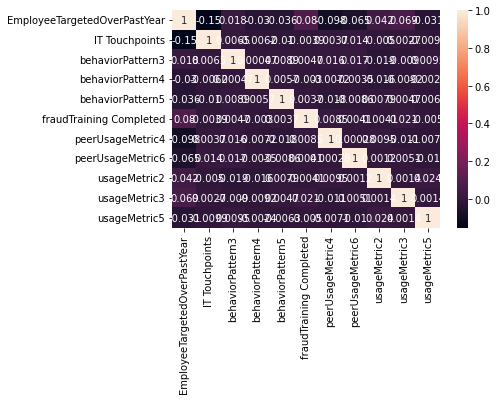

In [9]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns
,annot=True)

    Reviewing distribution between Employee Targeted or Not

In [10]:
employeeattackeddist = phishingattack.groupby('EmployeeTargetedOverPastYear')['fraudTraining Completed']
employeeattackeddist.describe()

,count,mean,std,min,25%,50%,75%,max
EmployeeTargetedOverPastYear,,,,,,,,
0.0,2240.0,0.410714,0.492073,0.0,0.0,0.0,1.0,1.0
1.0,11760.0,0.520493,0.499601,0.0,0.0,1.0,1.0,1.0


    Calculating Dataset label Distribution

In [11]:
totalRows = len(phishingattack)
positiveAttack = phishingattack.query('EmployeeTargetedOverPastYear == "1"').EmployeeTargetedOverPastYear.count()
negativeAttack= phishingattack.query('EmployeeTargetedOverPastYear == "0"').EmployeeTargetedOverPastYear.count()
print("Total Rows: ", totalRows)
print("Number of Positive Attacks: ", positiveAttack)
print("Number of Negative Attacks: ", negativeAttack)

Total Rows:  14000
Number of Positive Attacks:  11760
Number of Negative Attacks:  2240


In [12]:
print("Percentage of Positive Attacks in the sample: ", percentage(positiveAttack,totalRows))

Percentage of Positive Attacks in the sample:  84.0%


In [13]:
print("Percentage of Negative Attacks in the sample: ", percentage(negativeAttack,totalRows))

Percentage of Negative Attacks in the sample:  16.0%


    Feature Engineering: separating features and label

In [14]:
# Separate features and labels
features = ['IT Touchpoints','behaviorPattern3','behaviorPattern4','behaviorPattern5','fraudTraining Completed',"peerUsageMetric4","peerUsageMetric6","usageMetric2", "usageMetric3", "usageMetric5"]
label = 'EmployeeTargetedOverPastYear'
X, y = phishingattack[features].values, phishingattack[label].values

for n in range(0,5):
    print("Employee", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Employee 1 
  Features: [2, 2, 5, 4, 1, 3, 0, 2, 0, 2] 
  Label: 1.0
Employee 2 
  Features: [0, 3, 1, 3, 0, 1, 1, 2, 2, 2] 
  Label: 0.0
Employee 3 
  Features: [0, 0, 1, 6, 1, 2, 0, 3, 0, 1] 
  Label: 1.0
Employee 4 
  Features: [6, 0, 5, 0, 0, 3, 1, 3, 1, 1] 
  Label: 1.0
Employee 5 
  Features: [0, 0, 2, 1, 0, 4, 1, 0, 0, 0] 
  Label: 1.0


    Now let's compare the feature distributions for each label value.

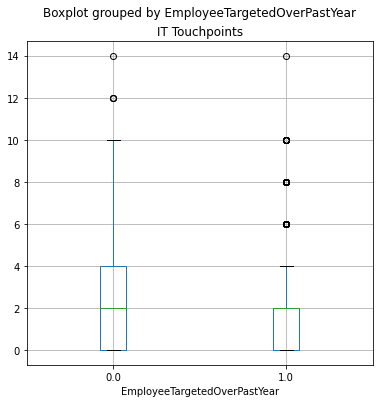

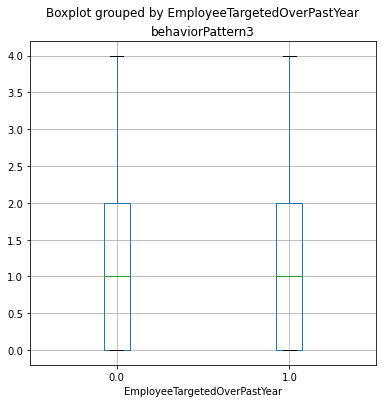

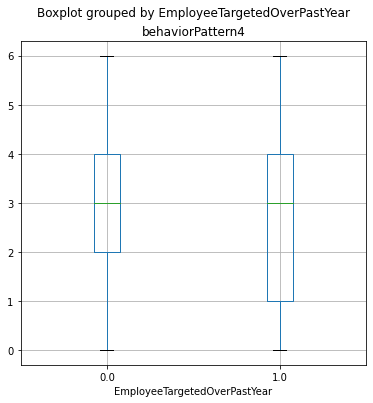

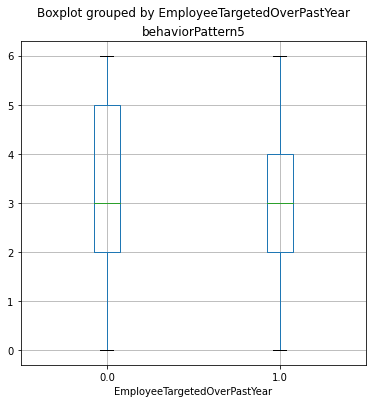

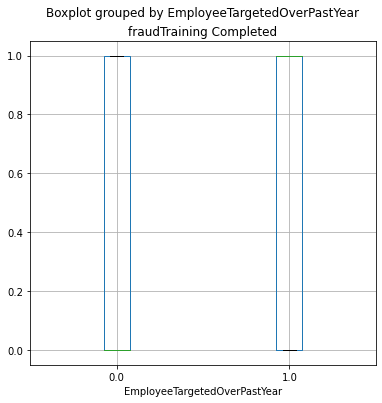

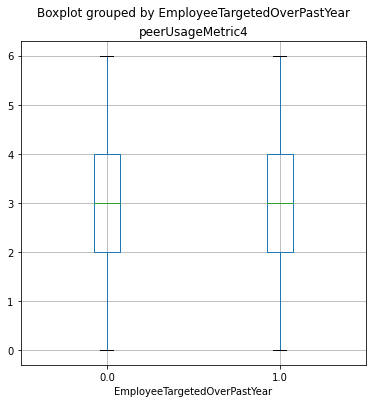

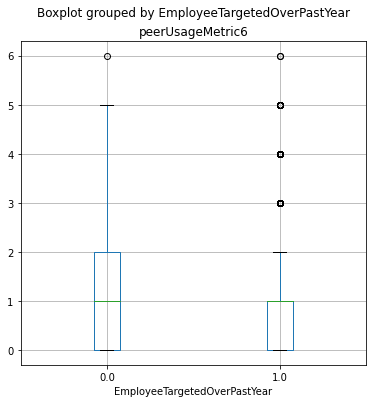

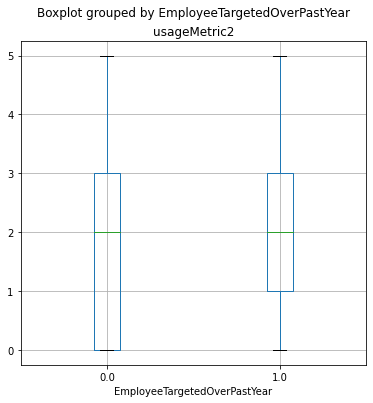

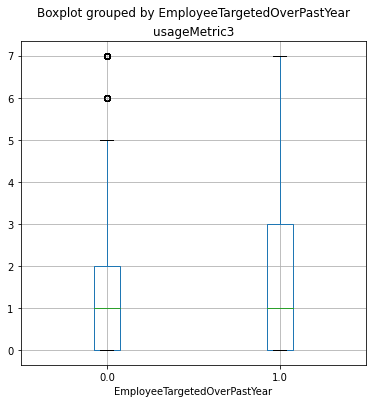

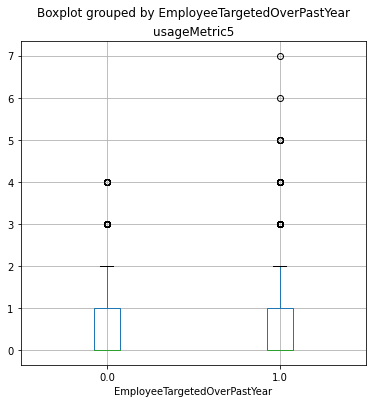

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
for col in features:
    phishingattack.boxplot(column=col, by='EmployeeTargetedOverPastYear', figsize=(6,6))
    plt.title(col)
plt.show()

### Modeling


    Split the data 70-30 Traning-Test

In [16]:
#We'll use that to split the data into 70% for training and hold back 30% for testing.
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))
dftrainlabel = pd.DataFrame(y_train, columns = ['EmployeeTargetedOverPastYear'])
totalTrainRows = len(dftrainlabel)
positiveTrainAttack = dftrainlabel.query('EmployeeTargetedOverPastYear == "1"').EmployeeTargetedOverPastYear.count()
negativeTrainAttack= dftrainlabel.query('EmployeeTargetedOverPastYear == "0"').EmployeeTargetedOverPastYear.count()
print("Total Training cases: ", str(totalTrainRows))
print("Positive Train Attack: ", str(positiveTrainAttack))
print("Negative Train Attack: ", str(negativeTrainAttack))

Training cases: 9800
Test cases: 4200
Total Training cases:  9800
Positive Train Attack:  8216
Negative Train Attack:  1584


    Calculating Training Label Distribution:

In [17]:
print('Positive: %d' % np.sum(y_train==1))
print('Negative: %d' % np.sum(y_train==0))

Positive: 8216
Negative: 1584


In [18]:
print("If seems we have an inbalanced label distribution!!!")

If seems we have an inbalanced label distribution!!!


    First Experiment: Logistic Regression (Ingenue experiment because we know about the inbalanced classes)

In [19]:
# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
LRIngenuemodel = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (LRIngenuemodel)

LogisticRegression(C=100.0, solver='liblinear')


    Evaluate the Model
Now we've trained the model using the training -inbalanced- data, we can use the test data we held back to evaluate how well it predicts. Let's start by using the model to predict labels for our test set, and compare the predicted labels to the known labels:

In [20]:
predictions = LRIngenuemodel.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [1. 1. 1. ... 1. 1. 1.]
Actual labels:     [1. 1. 1. ... 1. 1. 1.]


    Accuracy
Let's get some model metrics starting by: *accuracy* of the predictions - in simple terms, what proportion of the labels did the model predict correctly?

In [21]:
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.8485714285714285


    Precission,Recall, F1-Score and Support
Lets review other metrics that reveal a little more about how our model is performing. We'll use a *classification report* that provides more insight than raw accuracy alone.

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.04      0.07       656
         1.0       0.85      1.00      0.92      3544

    accuracy                           0.85      4200
   macro avg       0.85      0.52      0.49      4200
weighted avg       0.85      0.85      0.79      4200



In [23]:
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.8485139022051774
Overall Recall: 0.9988713318284425


    Confussion Matrix

In [24]:
# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[  24  632]
 [   4 3540]]


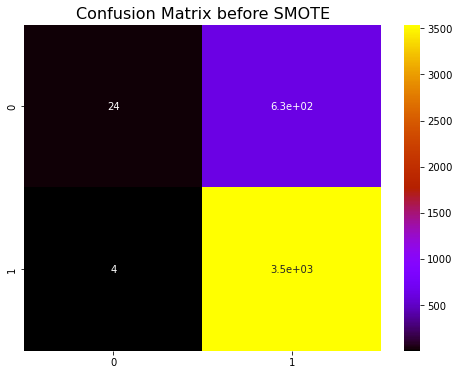

In [25]:
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix before SMOTE', size=16)
sns.heatmap(cm, annot=True, cmap='gnuplot')

    We can use the **predict_proba** method to see the probability pairs for each case:

In [26]:
y_scores = LRIngenuemodel.predict_proba(X_test)
print(y_scores)

[[0.06244167 0.93755833]
 [0.18535598 0.81464402]
 [0.07254684 0.92745316]
 ...
 [0.11759526 0.88240474]
 [0.08846902 0.91153098]
 [0.0944001  0.9055999 ]]


    ROC Curve

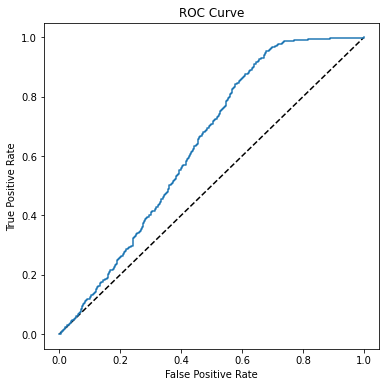

In [27]:
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

    Area under the curve (AUC)

In [28]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.6366239057424434


    Considering SMOTE to adreess the inbalanced class distribution (oversampling)

In [ ]:
#pip install imbalanced-Learn

In [ ]:
#pip install delayed

In [29]:
#RESTART KERNEL!!!!!!
from delayed.delay import delayed 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X,y)
print(f'''X before SMOTE: {X.shape}
X after SMOTE: {X_sm.shape}''')

X before SMOTE: (14000, 10)
X after SMOTE: (23520, 10)


    Reviewing with detail how SMOTE adjusted the original Dataset

In [30]:
print('Positive: %d' % np.sum(y_sm==1))
print('Negative: %d' % np.sum(y_sm==0))

Positive: 11760
Negative: 11760


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Label distribution for training before SMOTE')

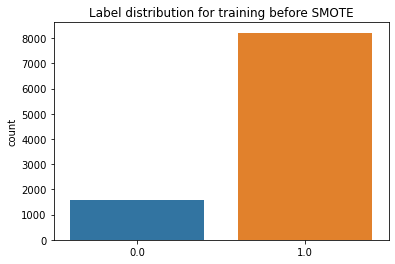

In [31]:
sns.countplot(y_train)
plt.title('Label distribution for training before SMOTE')

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Label distribution for training after SMOTE')

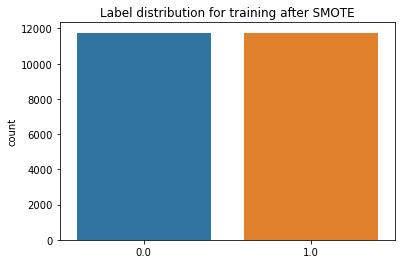

In [32]:
sns.countplot(y_sm)
plt.title('Label distribution for training after SMOTE')

    Spliting the new dataset (after SMOTE)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))
smdftrainlabel = pd.DataFrame(y_train, columns = ['EmployeeTargetedOverPastYear'])
totalTrainRows = len(smdftrainlabel)
positiveTrainAttack = smdftrainlabel.query('EmployeeTargetedOverPastYear == "1"').EmployeeTargetedOverPastYear.count()
negativeTrainAttack= smdftrainlabel.query('EmployeeTargetedOverPastYear == "0"').EmployeeTargetedOverPastYear.count()
print("Total Training cases: ", str(totalTrainRows))
print("Positive Train Attack: ", str(positiveTrainAttack))
print("Negative Train Attack: ", str(negativeTrainAttack))

Training cases: 16464
Test cases: 7056
Total Training cases:  16464
Positive Train Attack:  8206
Negative Train Attack:  8258


    Reviewing label balance after SMOTE in the training dataset

In [34]:
print('Positive: %d' % np.sum(y_train==1))
print('Negative: %d' % np.sum(y_train==0))

Positive: 8206
Negative: 8258


    Second Experiment: Again, Logistic Regression...this time with a balanced label training dataset.

In [35]:
# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
LRaftersmotemodel = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (LRaftersmotemodel)

LogisticRegression(C=100.0, solver='liblinear')


In [36]:
predictions = LRaftersmotemodel.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0. 1. 0. ... 1. 1. 1.]
Actual labels:     [0. 1. 1. ... 1. 0. 1.]


    Let's review the new metrics:

In [37]:
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.6547619047619048


In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66      3502
         1.0       0.66      0.64      0.65      3554

    accuracy                           0.65      7056
   macro avg       0.65      0.65      0.65      7056
weighted avg       0.66      0.65      0.65      7056



In [39]:
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.6626891734575088
Overall Recall: 0.640686550365785


In [40]:
# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2343 1159]
 [1277 2277]]


In [41]:
y_scores = LRaftersmotemodel.predict_proba(X_test)
print(y_scores)

[[0.65674686 0.34325314]
 [0.1354124  0.8645876 ]
 [0.62427754 0.37572246]
 ...
 [0.46422992 0.53577008]
 [0.45043706 0.54956294]
 [0.4107176  0.5892824 ]]


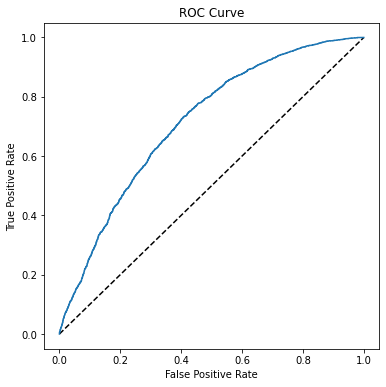

In [42]:
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [43]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.7136236886261955


It Looks Better!!!

    Feature selection with Boruta

In [44]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100))
select.fit(X_sm, y_sm)


SelectFromModel(estimator=RandomForestClassifier())

In [45]:
select.transform(X_sm)

array([[5, 4, 3, 2, 0],
       [1, 3, 1, 2, 2],
       [1, 6, 2, 3, 0],
       ...,
       [1, 2, 3, 2, 0],
       [4, 0, 3, 0, 2],
       [5, 2, 2, 0, 3]])

In [46]:
select.get_support()

array([False, False,  True,  True, False,  True, False,  True,  True,
       False])

In [47]:
len(select.get_support())

10

In [48]:
features

['IT Touchpoints',
 'behaviorPattern3',
 'behaviorPattern4',
 'behaviorPattern5',
 'fraudTraining Completed',
 'peerUsageMetric4',
 'peerUsageMetric6',
 'usageMetric2',
 'usageMetric3',
 'usageMetric5']

In [49]:
listfeatureimportance = list(select.get_support())
listfeatureimportance

[False, False, True, True, False, True, False, True, True, False]

In [50]:
dffeatimportance = pd.DataFrame({"FeatureName": features, "Importance" : listfeatureimportance})
dffeatimportance

,FeatureName,Importance
0,IT Touchpoints,False
1,behaviorPattern3,False
2,behaviorPattern4,True
3,behaviorPattern5,True
4,fraudTraining Completed,False
5,peerUsageMetric4,True
6,peerUsageMetric6,False
7,usageMetric2,True
8,usageMetric3,True
9,usageMetric5,False


In [51]:
dffeatimportance.sort_values(["Importance"], ascending=False)

,FeatureName,Importance
2,behaviorPattern4,True
3,behaviorPattern5,True
5,peerUsageMetric4,True
7,usageMetric2,True
8,usageMetric3,True
0,IT Touchpoints,False
1,behaviorPattern3,False
4,fraudTraining Completed,False
6,peerUsageMetric6,False
9,usageMetric5,False


    TODO: Consider an experiment with only the important features

    Third Experiment: Logistic Regression with a prep pipeline

In [52]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (I did'nt find any categorical feature in the original dataset)
#categorical_features = []
#categorical_transformer = Pipeline(steps=[
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, numeric_features),
#        ('cat', categorical_transformer, categorical_features)])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
LRplmodel = pipeline.fit(X_train, (y_train))
print (LRplmodel)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


The pipeline encapsulates the preprocessing steps as well as model training.

Let's use the model trained by this pipeline to predict labels for our test set, and compare the performance metrics with the basic model we created previously (second approach).

    Evaluating the model & showing the performance metrics

Confusion Matrix:
 [[2343 1159]
 [1277 2277]] 

Accuracy: 0.6547619047619048
Overall Precision: 0.6626891734575088
Overall Recall: 0.640686550365785
AUC: 0.7136249741686317


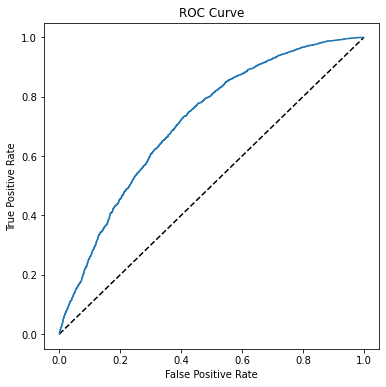

In [53]:
# Get predictions from test data
predictions = LRplmodel.predict(X_test)
y_scores = LRplmodel.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



The results look a little better, so clearly preprocessing the data has made a difference.

    Fouth Experiment: Let's try another algorithm **Random Forest** -using a Pipeline-

In [54]:
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
RFplmodel = pipeline.fit(X_train, (y_train))
print (RFplmodel)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9])])),
                ('logregressor', RandomForestClassifier())])


    Let's Evaluate & look at the performance metrics for the new model.

Confusion Matrix:
 [[3016  486]
 [ 562 2992]] 

Accuracy: 0.8514739229024944
Overall Precision: 0.8602645198389879
Overall Recall: 0.8418683173888576

AUC: 0.9239010299444615


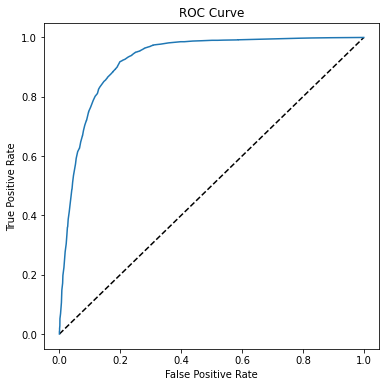

In [55]:
predictions = RFplmodel.predict(X_test)
y_scores = RFplmodel.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

It looks even better!

### Deployment


    Saving the model


Now that we have a reasonably useful trained model, we can save it for use later to predict labels for new data:

In [56]:
# Save the model as a pickle file
filename = './PsishingAttackXYZ_RFmodel.pkl'
joblib.dump(RFplmodel, filename)

['./PsishingAttackXYZ_RFmodel.pkl']

    Registering model

In [57]:
ws = Workspace.from_config()

#train_features, test_features, train_labels, test_labels

model = Model.register(workspace=ws,
                       model_name='PishingAttack-RFModel',                # Name of the registered model in your workspace.
                       model_path=filename,  # Local file to upload and register as a model.
                       model_framework=Model.Framework.SCIKITLEARN,  # Framework used to create the model.
                       model_framework_version=sklearn.__version__,  # Version of scikit-learn used to create the model.                       
                       resource_configuration=ResourceConfiguration(cpu=1, memory_in_gb=4),
                       description='Random Forest to predict Pishing Attack.'
                       )

print('Name:', model.name)
print('Version:', model.version)

Registering model PishingAttack-RFModel
Name: PishingAttack-RFModel
Version: 1


    Generating the score file

In [58]:
%%writefile score.py

def init():
    global model
    # Replace filename if needed.
    path = os.getenv('AZUREML_MODEL_DIR') 
    #model_path = os.path.join(path, 'EmployeeLeftXYZ_model.pkl')
    model_path = filename
    # Deserialize the model file back into a sklearn model.
    model = joblib.load(model_path)

    
input_sample = pd.DataFrame(data=[{    
    "IT Touchpoints": 2,
    "behaviorPattern3": 2,
    "behaviorPattern4": 5,
    "behaviorPattern5":4,
    "fraudTraining Completed":1,
    "peerUsageMetric4":3,
    "peerUsageMetric6":0,
    "usageMetric2": 2,
    "usageMetric3":0,
    "usageMetric5":2
}])


# This is an integer type sample. Use the data type that reflects the expected result.
output_sample = np.array([0])

# To indicate that we support a variable length of data input,
# set enforce_shape=False
@input_schema('data', PandasParameterType(input_sample))
@output_schema(NumpyParameterType(output_sample))
def run(data):
    try:
        print("input_data....")
        print(data.columns)
        print(type(data))
        result = model.predict(data)
        print("result.....")
        print(result)
    # You can return any data type, as long as it can be serialized by JSON.
        return result.tolist()
    except Exception as e:
        error = str(e)
        return error

Writing score.py


    Establishing Environment

In [59]:
environment = Environment('my-sklearn-environment')
environment.python.conda_dependencies = CondaDependencies.create(pip_packages=[
    'azureml-defaults',
    'inference-schema[numpy-support]',
    'joblib',
    'numpy',
    'pandas',
    'scikit-learn=={}'.format(sklearn.__version__)
])

inference_config = InferenceConfig(entry_script='./score.py',environment=environment)


    Deployment to a Test Environemnto with ACI

In [ ]:
deployment_config = AciWebservice.deploy_configuration(cpu_cores = 1, memory_gb = 1)
service = Model.deploy(ws, "aciservice1", [model], inference_config, deployment_config)
service.wait_for_deployment(show_output = True)
print(service.state)

    Looking for / creating an AKS cluster for PROD purposes

In [ ]:
from azureml.core.compute import ComputeTarget
from azureml.core.compute_target import ComputeTargetException

# Choose a name for your AKS cluster
aks_name = 'InferenceCluster' 

# Verify that cluster does not exist already
try:
    aks_target = ComputeTarget(workspace=ws, name=aks_name)
    print('Found existing cluster, use it.')
except ComputeTargetException:
    # Use the default configuration (can also provide parameters to customize)
    prov_config = AksCompute.provisioning_configuration()

    # Create the cluster
    aks_target = ComputeTarget.create(workspace = ws, 
                                    name = aks_name, 
                                    provisioning_configuration = prov_config)

if aks_target.get_status() != "Succeeded":
    aks_target.wait_for_completion(show_output=True)

    Setting up the configuration    

In [ ]:
from azureml.core import Workspace
from azureml.core.compute import AksCompute, ComputeTarget
from azureml.core.webservice import Webservice, AksWebservice

# Set the web service configuration (using default here)
aks_config = AksWebservice.deploy_configuration()

# # Enable token auth and disable (key) auth on the webservice
# aks_config = AksWebservice.deploy_configuration(token_auth_enabled=True, auth_enabled=False)

    PROD Deployment in an AKS cluster

In [ ]:
%%time
aks_service_name ='employeeleftxyz-rf-3'

aks_service = Model.deploy(workspace=ws,
                           name=aks_service_name,
                           models=[model],
                           inference_config=inference_config,
                           deployment_config=aks_config,
                           deployment_target=aks_target)

aks_service.wait_for_deployment(show_output = True)
print(aks_service.state)

    TODO: Consider a MLOps strategy including CI & CD tasks

# THE END, THANKS AWESOME PROGRAM EDSP!!!!!!! I LEARNED A LOT!!!!